In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv('data/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [43]:
#check if the data set contains any null values 
df[df.isnull().any(axis=1)].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [44]:
round(df.describe(),2)

,age,balance,day,duration,campaign,pdays,previous
count,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00
mean,41.23,1528.54,15.66,371.99,2.51,51.33,0.83
std,11.91,3225.41,8.42,347.13,2.72,108.76,2.29
min,18.00,-6847.00,1.00,2.00,1.00,-1.00,0.00
25%,32.00,122.00,8.00,138.00,1.00,-1.00,0.00
50%,39.00,550.00,15.00,255.00,2.00,-1.00,0.00
75%,49.00,1708.00,22.00,496.00,3.00,20.75,1.00
max,95.00,81204.00,31.00,3881.00,63.00,854.00,58.00


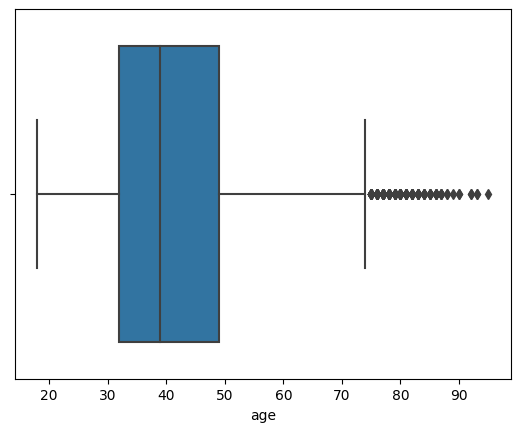

In [45]:
# box plot for the age
g = sns.boxplot(x=df["age"])

/tmp/ipykernel_24494/1104420190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age, bins=100)


<AxesSubplot: xlabel='age', ylabel='Density'>

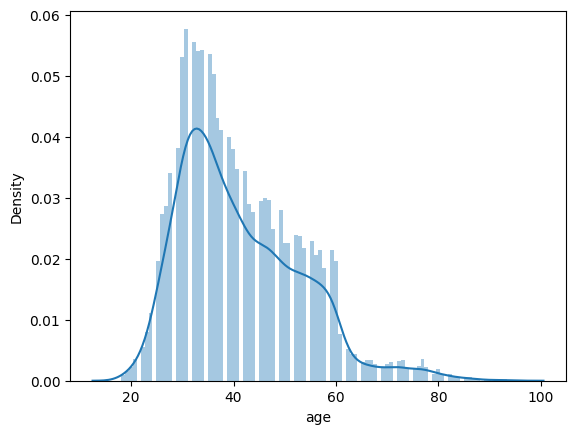

In [46]:
# distribution of age
sns.distplot(df.age, bins=100)

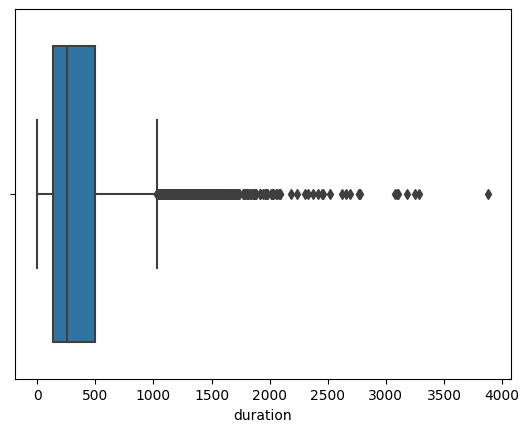

In [47]:
# box plot for the duration
g = sns.boxplot(x=df["duration"])

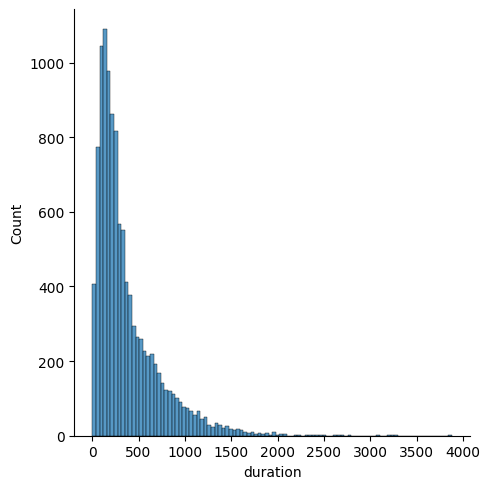

In [48]:
# distribution of duration
sns.displot(df.duration, bins=100)

***Convert categorical data***

In [49]:
df1 = df.copy()

In [50]:
df1.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

In [51]:
df1['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [52]:
df1[(df1.deposit == "yes")]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,retired,divorced,primary,no,1389,no,no,cellular,8,apr,335,1,-1,0,unknown,yes
5285,30,management,single,tertiary,no,398,no,no,cellular,27,oct,102,1,180,3,success,yes
5286,69,retired,divorced,tertiary,no,247,no,no,cellular,22,apr,138,2,-1,0,unknown,yes
5287,48,entrepreneur,married,secondary,no,0,no,yes,cellular,28,jul,431,2,-1,0,unknown,yes


In [53]:
# Investigate the relationship between job categories and the individuals who made a deposit.
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']
for j in jobs:
    # print(j)
    print("{:15} : {:5}". format(j, len(df1[(df1.deposit == "yes") & (df1.job ==j)])))


management      :  1301
blue-collar     :   708
technician      :   840
admin.          :   631
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34


In [54]:
df1.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [55]:
# Aggregate similar job categories into groups
df1['job'] = df1['job'].replace(['management', 'admin.'], 'white-collar')
df1['job'] = df1['job'].replace(['services','housemaid'], 'pink-collar')
df1['job'] = df1['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [56]:
df1.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [57]:
df1.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [58]:
# Merge the job categories 'unknown' and 'other' into a single category called 'other', as neither of them aligns clearly with either 'success' or 'failure'.
df1['poutcome'] = df1['poutcome'].replace(['other'] , 'unknown')

In [59]:
df1.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [60]:
# Exclude the 'contact' category from the analysis since every participant has already been contacted.
df1.drop('contact', axis=1, inplace=True)

In [63]:
df1["default"]
df1['default_cat'] = df1['default'].map( {'yes':1, 'no':0} )
df1.drop('default', axis=1,inplace = True)

In [65]:
df1["housing_cat"]=df1['housing'].map({'yes':1, 'no':0})
df1.drop('housing', axis=1,inplace = True)

In [67]:
df1["loan_cat"] = df1['loan'].map({'yes':1, 'no':0})
df1.drop('loan', axis=1, inplace=True)

In [69]:
df1.drop('month', axis=1, inplace=True)
df1.drop('day', axis=1, inplace=True)

In [71]:
df1["deposit_cat"] = df1['deposit'].map({'yes':1, 'no':0})
df1.drop('deposit', axis=1, inplace=True)

In [72]:
df1.head(5)

,age,job,marital,education,balance,duration,campaign,pdays,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat
0,59,white-collar,married,secondary,2343,1042,1,-1,0,unknown,0,1,0,1
1,56,white-collar,married,secondary,45,1467,1,-1,0,unknown,0,0,0,1
2,41,technician,married,secondary,1270,1389,1,-1,0,unknown,0,1,0,1
3,55,pink-collar,married,secondary,2476,579,1,-1,0,unknown,0,1,0,1
4,54,white-collar,married,tertiary,184,673,2,-1,0,unknown,0,0,0,1


In [73]:
print("Customers that have not been contacted before:", len(df1[df1.pdays==-1]))
print("Maximum values on padys    :", df1['pdays'].max())

Customers that have not been contacted before: 8324
Maximum values on padys    : 854


In [74]:
# Map the value '-1' for 'padys' to a larger value, such as '10000', to signify that it is a distant past that has no significant effect.
df1.loc[df1['pdays'] == -1, 'pdays'] = 10000

In [75]:
# Create a new column called 'recent_pdays' to represent the recency of 'pdays' information.
df1['recent_pdays'] = np.where(df1['pdays'], 1/df1.pdays, 1/df1.pdays)

# Drop 'pdays'
df1.drop('pdays', axis=1, inplace = True)

In [76]:
df1.head()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
0,59,white-collar,married,secondary,2343,1042,1,0,unknown,0,1,0,1,0.0001
1,56,white-collar,married,secondary,45,1467,1,0,unknown,0,0,0,1,0.0001
2,41,technician,married,secondary,1270,1389,1,0,unknown,0,1,0,1,0.0001
3,55,pink-collar,married,secondary,2476,579,1,0,unknown,0,1,0,1,0.0001
4,54,white-collar,married,tertiary,184,673,2,0,unknown,0,0,0,1,0.0001


***Convert categorical variables to dummy variables, also known as one-hot encoding, to represent each category as a binary column.***

In [81]:
df_with_dummies = pd.get_dummies(data=df1, columns = ['job', 'marital', 'education', 'poutcome'],prefix = ['job', 'marital', 'education', 'poutcome'])
df_with_dummies.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.0001,...,0,1,0,0,0,1,0,0,0,1


In [82]:
df_with_dummies.shape

(11162, 27)

In [86]:
round(df_with_dummies.describe(),2)

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,...,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00
mean,41.23,1528.54,371.99,2.51,0.83,0.02,0.47,0.13,0.47,0.00,...,0.12,0.57,0.32,0.13,0.49,0.33,0.04,0.11,0.10,0.79
std,11.91,3225.41,347.13,2.72,2.29,0.12,0.50,0.34,0.50,0.03,...,0.32,0.50,0.46,0.34,0.50,0.47,0.21,0.31,0.29,0.40
min,18.00,-6847.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,32.00,122.00,138.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,39.00,550.00,255.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,49.00,1708.00,496.00,3.00,1.00,0.00,1.00,0.00,1.00,0.00,...,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00
max,95.00,81204.00,3881.00,63.00,58.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


***Perform observations and analysis on the entire population.***

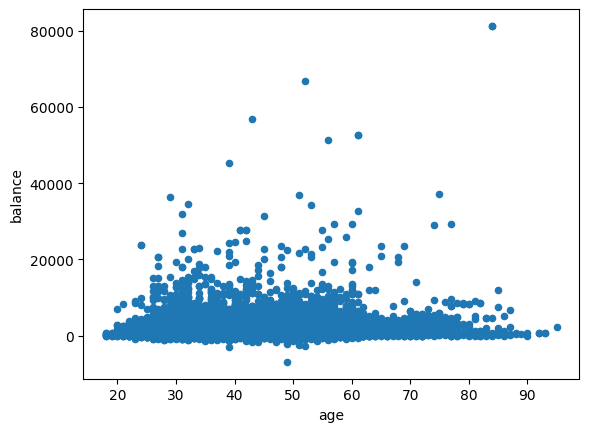

In [87]:
# Create a scatter plot to visualize the relationship between age and balance variables.
df_with_dummies.plot(kind='scatter', x='age', y='balance');
# Across all age groups, the majority of individuals have savings of less than 20000.

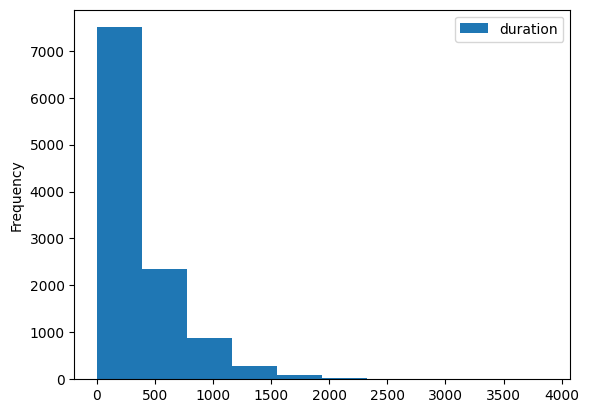

In [88]:
df_with_dummies.plot(kind='hist', x='poutcome_success', y='duration');

***Perform an analysis specifically on individuals who have signed up for a term deposit.***

In [89]:
df_with_dummies[df1.deposit_cat == 1].describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,1.0,0.004238,...,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.0,0.035686,...,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.005128,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***Analyze the characteristics of individuals who have signed up for a term deposit, specifically examining their personal loan (loan_cat) and housing loan (housing_cat) status.***

In [91]:
len(df_with_dummies[(df_with_dummies.deposit_cat == 1) & (df_with_dummies.loan_cat) & (df_with_dummies.housing_cat)])

265

***Analyze the group of individuals who have signed up for a term deposit and have a history of credit default.***

In [92]:
len(df_with_dummies[(df_with_dummies.deposit_cat == 1) & (df_with_dummies.default_cat ==1)])

52

<AxesSubplot: xlabel='job', ylabel='deposit_cat'>

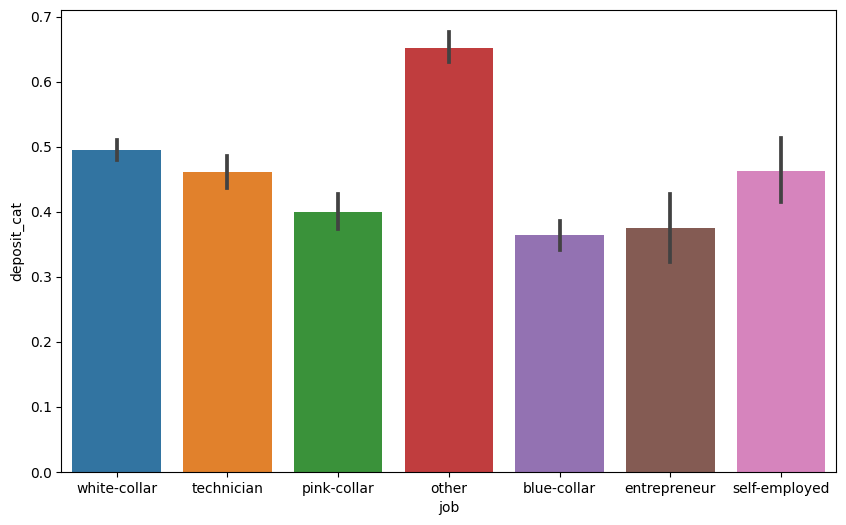

In [93]:
# Create a bar chart to visualize the relationship between job categories and deposit status.
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'deposit_cat', data = df1)

<AxesSubplot: xlabel='poutcome', ylabel='duration'>

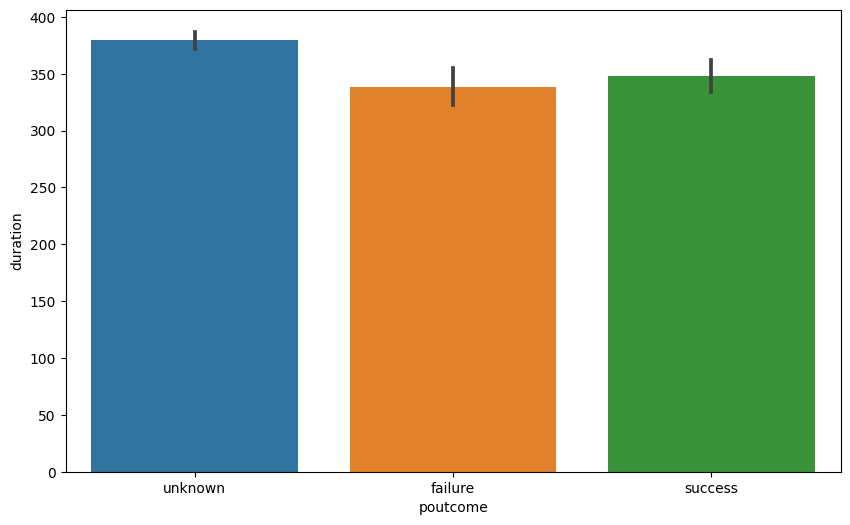

In [94]:
#Create a bar chart to compare the "previous outcome" and "call duration" variables.
plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = df1)

# Classification

In [96]:
dfcl = df_with_dummies

In [98]:
# Generate a correlation matrix to examine the relationships between variables in the dataset.
corr = dfcl.corr()
corr

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,0.020169,-0.011425,-0.168700,-0.031418,0.034901,0.019102,...,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,-0.060954,-0.077092,-0.084589,0.081129,-0.004379,...,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,-0.009760,0.035051,-0.001914,0.451919,-0.014868,...,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,0.030975,0.006660,0.034722,-0.128081,-0.026296,...,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,-0.035273,-0.000840,-0.022668,0.139867,0.122076,...,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
default_cat,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,1.000000,0.011076,0.076434,-0.040680,-0.011290,...,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
housing_cat,-0.168700,-0.077092,0.035051,0.006660,-0.000840,0.011076,1.000000,0.076761,-0.203888,-0.029350,...,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,0.076434,0.076761,1.000000,-0.110580,-0.012697,...,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
deposit_cat,0.034901,0.081129,0.451919,-0.128081,0.139867,-0.040680,-0.203888,-0.110580,1.000000,0.034457,...,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785
recent_pdays,0.019102,-0.004379,-0.014868,-0.026296,0.122076,-0.011290,-0.029350,-0.012697,0.034457,1.000000,...,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,0.119598,-0.126890


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

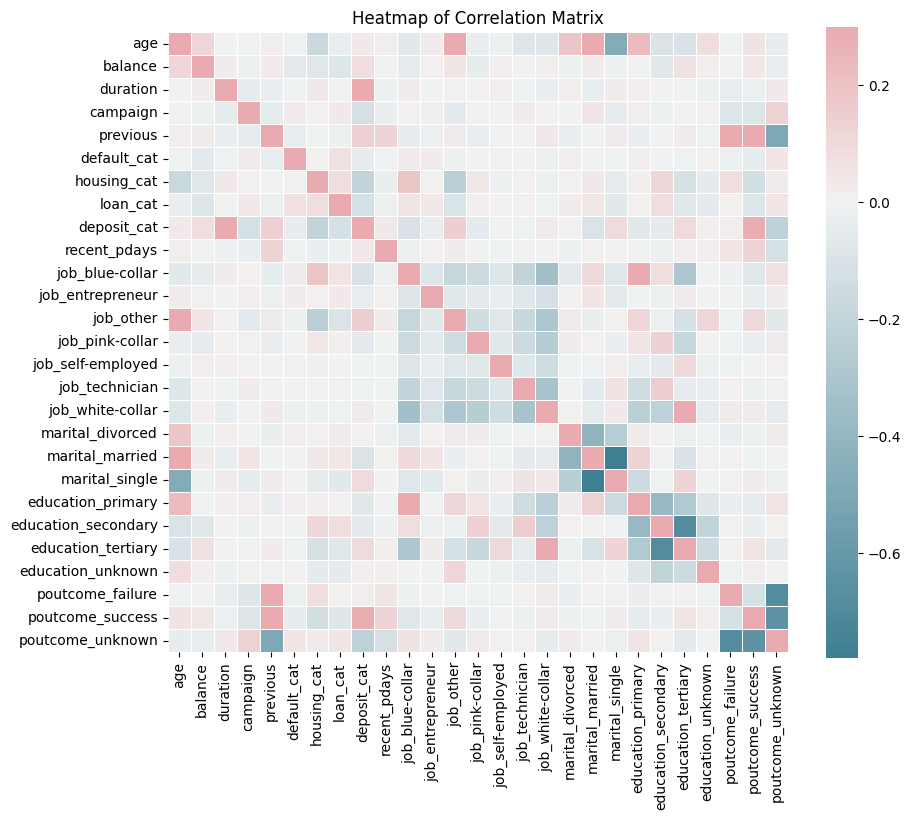

In [99]:
# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [109]:
# Extract the 'deposit_cat' column, which represents the dependent variable, from the dataset.
corr_deposite = pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))
corr_deposite.sort_values(by = 'deposit_cat', ascending = False)

,deposit_cat
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457
job_white-collar,0.031621


# Build the Data Model

In [110]:
X = dfcl.drop('deposit_cat', 1)

/tmp/ipykernel_24494/2606719902.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dfcl.drop('deposit_cat', 1)


In [111]:
X

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,recent_pdays,job_blue-collar,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,0.000100,0,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,0.000100,0,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,0.000100,0,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,0.000100,0,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,0.000100,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,0,1,0,0.000100,1,...,0,0,1,1,0,0,0,0,0,1
11158,39,733,83,4,0,0,0,0,0.000100,0,...,0,1,0,0,1,0,0,0,0,1
11159,32,29,156,2,0,0,0,0,0.000100,0,...,0,0,1,0,1,0,0,0,0,1
11160,43,0,9,2,5,0,0,1,0.005814,0,...,0,1,0,0,1,0,0,1,0,0


In [112]:
y = dfcl.deposit_cat
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit_cat, Length: 11162, dtype: int64

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [116]:
from sklearn.tree import DecisionTreeClassifier

***Decision tree with depth = 2***

In [121]:
dtc2 = DecisionTreeClassifier(random_state=1, max_depth=2)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [122]:
dtc2_score_train = dtc2.score(X_train, y_train)
print("Training score: ",dtc2_score_train)

Training score:  0.7285250307985217


In [123]:
dtc2_score_test = dtc2.score(X_test, y_test)
print("Testing score: ",dtc2_score_test)

Testing score:  0.7268248992386923


***Decision tree with depth = 3***

In [126]:
dtc3 = DecisionTreeClassifier(random_state=1, max_depth=3)
dtc3.fit(X_train, y_train)
dtc3_score_train = dtc3.score(X_train, y_train)
print("Training score: ",dtc3_score_train)
dtc3_score_test = dtc3.score(X_test, y_test)
print("Testing score: ",dtc3_score_test)

Training score:  0.770411020271027
Testing score:  0.7572772055530677


***Decision tree with depth = 4***

In [127]:
dtc4 = DecisionTreeClassifier(random_state=1, max_depth=4)
dtc4.fit(X_train, y_train)
dtc4_score_train = dtc4.score(X_train, y_train)
print("Training score: ",dtc4_score_train)
dtc4_score_test = dtc4.score(X_test, y_test)
print("Testing score: ",dtc4_score_test)

Training score:  0.7885541494008288
Testing score:  0.774294670846395


***Decision tree with depth = 6***

In [129]:
dtc6 = DecisionTreeClassifier(random_state=1, max_depth=6)
dtc6.fit(X_train, y_train)
dtc6_score_train = dtc6.score(X_train, y_train)
print("Training score: ",dtc6_score_train)
dtc6_score_test = dtc6.score(X_test, y_test)
print("Testing score: ",dtc6_score_test)

Training score:  0.8080412140217269
Testing score:  0.7796686072548141


***Decision tree: To the full depth***

In [131]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_score_train = dtc.score(X_train, y_train)
print("Training score: ",dtc_score_train)
dtc_score_test = dtc.score(X_test, y_test)
print("Testing score: ",dtc_score_test)

Training score:  1.0
Testing score:  0.7357814599193909


In [132]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dtc2_score_train, dtc2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dtc3_score_train, dtc3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dtc4_score_train, dtc4_score_test))
print('{:1} {:>25} {:>20}'.format(6, dtc6_score_train, dtc6_score_test))
print('{:1} {:>23} {:>20}'.format("max", dtc_score_train, dtc_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.7285250307985217   0.7268248992386923
3         0.770411020271027   0.7572772055530677
4        0.7885541494008288    0.774294670846395
6        0.8080412140217269   0.7796686072548141
max                     1.0   0.7357814599193909


In [137]:
features = X.columns.tolist()
features

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'default_cat',
 'housing_cat',
 'loan_cat',
 'recent_pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown']

In [141]:
from sklearn.tree import export_graphviz
from graphviz import Source

In [142]:
export_graphviz(dtc2, out_file='tree_depth_2.dot', feature_names=features)

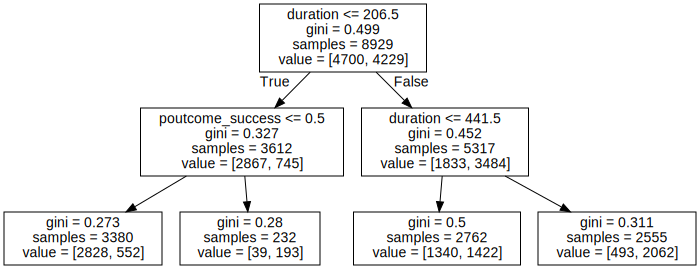

In [143]:
Source.from_file("tree_depth_2.dot")

In [144]:
dtc2.classes_

array([0, 1])

In [145]:
features = X.columns.tolist()
features

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'default_cat',
 'housing_cat',
 'loan_cat',
 'recent_pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown']

***Investigate most important features with depth =2***

In [151]:
dt2 = DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(X_train, y_train)
fi = dt2.feature_importances_
# print(fi)
l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

age................. 0.0
balance............. 0.0
duration............ 0.849306123902405
campaign............ 0.0
previous............ 0.0
default_cat......... 0.0
housing_cat......... 0.0
loan_cat............ 0.0
recent_pdays........ 0.0
job_blue-collar..... 0.0
job_entrepreneur.... 0.0
job_other........... 0.0
job_pink-collar..... 0.0
job_self-employed... 0.0
job_technician...... 0.0
job_white-collar.... 0.0
marital_divorced.... 0.0
marital_married..... 0.0
marital_single...... 0.0
education_primary... 0.0
education_secondary. 0.0
education_tertiary.. 0.0
education_unknown... 0.0
poutcome_failure.... 0.0
poutcome_success.... 0.15069387609759496
poutcome_unknown.... 0.0


# Predictions

In [152]:
print("Mean duration   : ", X.duration.mean())
print("Maximun duration: ", X.duration.max())
print("Minimum duration: ", X.duration.min())

Mean duration   :  371.99381831213043
Maximun duration:  3881
Minimum duration:  2


In [153]:
# Predict: Successful deposite with a call duration = 371 sec

print(dt2.predict_proba(np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
print(dt2.predict(np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
# column 0: probability for class 0 (not signed for term deposite) & column 1: probability for class 1
# Probability of Successful deposite = 0.51484432

[[0.48515568 0.51484432]]
[1]


/home/kazi/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/kazi/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [154]:
# Predict: Successful deposite with a maximun call duration = 3881 sec

print(dt2.predict_proba(np.array([0, 0, 3881, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
print(dt2.predict(np.array([0, 0, 3881, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))

[[0.19295499 0.80704501]]
[1]


/home/kazi/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/kazi/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [155]:
X.iloc[985]

age                      46.000000
balance                3354.000000
duration                522.000000
campaign                  1.000000
previous                  1.000000
default_cat               0.000000
housing_cat               1.000000
loan_cat                  0.000000
recent_pdays              0.005747
job_blue-collar           0.000000
job_entrepreneur          0.000000
job_other                 1.000000
job_pink-collar           0.000000
job_self-employed         0.000000
job_technician            0.000000
job_white-collar          0.000000
marital_divorced          1.000000
marital_married           0.000000
marital_single            0.000000
education_primary         0.000000
education_secondary       1.000000
education_tertiary        0.000000
education_unknown         0.000000
poutcome_failure          0.000000
poutcome_success          1.000000
poutcome_unknown          0.000000
Name: 985, dtype: float64

In [156]:
# Predict: Probability for above

print(dt2.predict_proba(np.array([46,3354,522,1,1,0,1,0,0.005747,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0]).reshape(1, -1)))
#print(ctree.predict(np.array([46,3354,522,1,1,0,1,0,0.005747,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0]).reshape(1, -1)))

[[0.19295499 0.80704501]]


/home/kazi/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [161]:
from sklearn.metrics import accuracy_score, roc_auc_score
# Make predictions on the test set
preds = dt2.predict(X_test)

# Calculate accuracy
print("\nAccuracy score: \n{}".format(accuracy_score(y_test, preds)))

# Make predictions on the test set using predict_proba
probs = dt2.predict_proba(X_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(roc_auc_score(y_test, probs)))


Accuracy score: 
0.7268248992386923

Area Under Curve: 
0.7880265888143609


***GridSearchCV***

In [162]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cv.best_estimator_